In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

### Original atts:
age; sex (1,0); cp (1-4); trestbps; chol; fbs (1,0); restecg (0,1,2); thalach; exang (1,0); oldpeak; slope (1,2,3); ca; thal (3,6,7); class att: 0 is healthy, 1,2,3,4 is sick.

In [14]:
hd = pd.read_csv('../data/processed.cleveland.data', header=None)
hd.columns = ["age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "resting_electrocardiographic", "max_heart_rate_achieved", "exercise_induced_angina", "ST_depression_induced_by_exercise", "peak_exercise_st_slope", "major_vessels_count", "thalassemia", "target"]

# TODO: Ask Bernat at what point do we split off our data for testing? Do we need to run our test data through pre-processing "on it's own"? If using jupyter, this means I am passing the data through the same statements as before, seems redundant and unnecessary.
hd.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise,peak_exercise_st_slope,major_vessels_count,thalassemia,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
hd.shape

(303, 14)

In [4]:
hd.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise,peak_exercise_st_slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


TODO: While trying to convert to numeric, some rows where found with "?". These rows are dropped.
what are the 3-4 typical thigns to do searching for missing values. DO IT

In [15]:
hd = hd[hd["major_vessels_count"]!="?"]
hd = hd[hd["thalassemia"]!="?"]

In [22]:
# pd.to_numeric(hd["major_vessels_count"])
# pd.to_numeric(hd["thalassemia"])
hd = hd.apply(pd.to_numeric)

Now that we have renamed our column headers and changed the column types, we will split the data into a train and test model and continue pre-processing on only the training data so as not to introduce data spill.

We will replace the targets from a range of heart disease severity to a simply Yes/No for heart disease.

To ensure that we have an equivalent split of individuals with and without heart disease, we will set the parameter `stratify` to `y[hd_split["target"]]` so that we have an equivlant number of data points in our test and model data.

In [47]:
hd_split = hd
hd["target"] = hd["target"].replace([0,1,2,3,4],[0,1,1,1,1])
hd_split.astype(float)
X = hd_split.iloc[:,:-1]
y = hd_split["target"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y[hd_split["target"]])
# creating hd_train to be used for exploratory data analysis
hd_train, hd_test = train_test_split(hd, test_size=0.2, random_state=42)
print(f"Test stratification is: {y_test.mean()}")
print(f"Train stratification is: {y_train.mean()}")

Test stratification is: 0.4666666666666667
Train stratification is: 0.459915611814346


In [50]:
X_train.to_csv("../data/processed/X_train")
X_test.to_csv("../data/processed/X_final_test")
y_train.to_csv("../data/processed/y_train")
y_test.to_csv("../data/processed/y_final_test")

# Pandas Profile Report
Here we create a pandas profile report and save it to the processed file. This line of code is commented out as we only need to run it once. The profile provides some good insights on the different variables and would be a good place to start next time. It was discovered as a tool half-way through the pre-processing.

In [7]:
# profile = pp.ProfileReport(hd, title="Profile Report of Heart Disease Dataset")
# profile.to_file("../data/processed/hd_data_profile.html")

In [8]:
objectAttributesKey = ["sex", "chest_pain_type", "fasting_blood_sugar", "resting_electrocardiographic", "exercise_induced_angina", "peak_exercise_st_slope", "major_vessels_count", "thalassemia", "target"]
objectAttributes = {i: "object" for i in objectAttributesKey}

integerAttributesKey = ["age", "resting_blood_pressure", "cholesterol", "max_heart_rate_achieved", "ST_depression_induced_by_exercise"]
integerAttributes = {i: "float" for i in integerAttributesKey}

attributeTypes = objectAttributes | integerAttributes
hd=hd.astype(attributeTypes)

hd.dtypes

age                                  float64
sex                                   object
chest_pain_type                       object
resting_blood_pressure               float64
cholesterol                          float64
fasting_blood_sugar                   object
resting_electrocardiographic          object
max_heart_rate_achieved              float64
exercise_induced_angina               object
ST_depression_induced_by_exercise    float64
peak_exercise_st_slope                object
major_vessels_count                   object
thalassemia                           object
target                                object
dtype: object

In [9]:
hd["target"] = hd["target"].replace([0,1,2,3,4],["Healthy", "Sick","Sick","Sick", "Sick"])

hd.loc[hd.target == "2"] = "Sick"
hd.loc[hd.target == "3"] = "Sick"
hd.loc[hd.target == "4"] = "Sick"
hd.loc[hd.target == "1"] = "Healthy"
hd['target'].value_counts()

Healthy    160
Sick       137
Name: target, dtype: int64

In [17]:
hd.describe()
hd.dtypes

age                                  float64
sex                                  float64
chest_pain_type                      float64
resting_blood_pressure               float64
cholesterol                          float64
fasting_blood_sugar                  float64
resting_electrocardiographic         float64
max_heart_rate_achieved              float64
exercise_induced_angina              float64
ST_depression_induced_by_exercise    float64
peak_exercise_st_slope               float64
major_vessels_count                  float64
thalassemia                          float64
target                                 int64
dtype: object

In [11]:
hd.describe(include="float")

ValueError: No objects to concatenate

In [12]:
hd.describe(include="object")
hd.head

<bound method NDFrame.head of       age  sex chest_pain_type resting_blood_pressure cholesterol  \
0    63.0  1.0             1.0                  145.0       233.0   
1    67.0  1.0             4.0                  160.0       286.0   
2    67.0  1.0             4.0                  120.0       229.0   
3    37.0  1.0             3.0                  130.0       250.0   
4    41.0  0.0             2.0                  130.0       204.0   
..    ...  ...             ...                    ...         ...   
297  57.0  0.0             4.0                  140.0       241.0   
298  45.0  1.0             1.0                  110.0       264.0   
299  68.0  1.0             4.0                  144.0       193.0   
300  57.0  1.0             4.0                  130.0       131.0   
301  57.0  0.0             2.0                  130.0       236.0   

    fasting_blood_sugar resting_electrocardiographic max_heart_rate_achieved  \
0                   1.0                          2.0         

# Taking Care of missing data

In [13]:
print(hd.shape)
hd1=hd.dropna()
print(hd1.shape)

(297, 14)
(297, 14)


In [19]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: target, dtype: int64

# Finding Outliers

We will take a look at the 1.5*IQR and visualize with boxplots to see if there are any outliers we need to deal with.
Boxplots will be plotted against our tagert value of healthy and unhealthy to start seeing if there is any correlation between our numerical attributes and target variable.

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='age'>

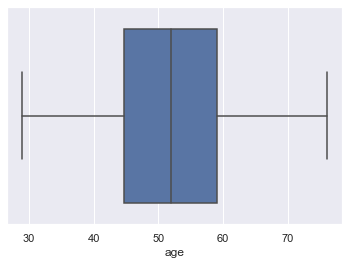

In [144]:
hd_test = hd[hd['target'] == "Sick"]
hd_test2 = hd[hd['target'] == "Healthy"]
# sns.boxplot(x=hd_test["age"], orient="v")
sns.boxplot(x=hd_test2["age"], orient="v")

age lower and upper 1.5*IQR and values outside this range is: 
 lower: 26.0	upper: 82.0 
value count: 0
resting_blood_pressure lower and upper 1.5*IQR and values outside this range is: 
 lower: 90.0	upper: 170.0 
value count: 8
cholesterol lower and upper 1.5*IQR and values outside this range is: 
 lower: 117.5	upper: 369.5 
value count: 5
max_heart_rate_achieved lower and upper 1.5*IQR and values outside this range is: 
 lower: 82.5	upper: 214.5 
value count: 1
ST_depression_induced_by_exercise lower and upper 1.5*IQR and values outside this range is: 
 lower: -2.7	upper: 4.5 
value count: 1


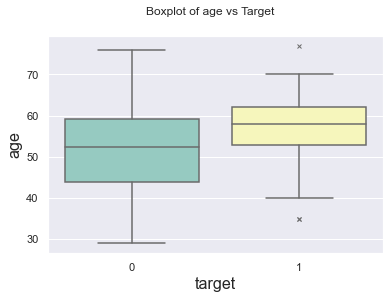

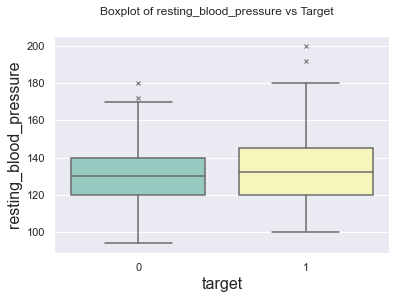

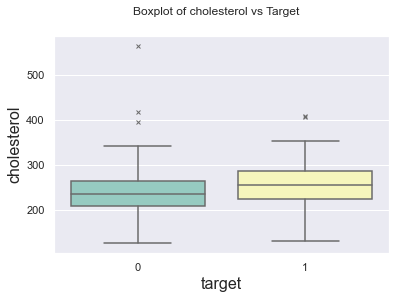

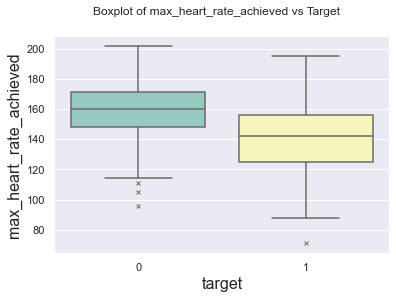

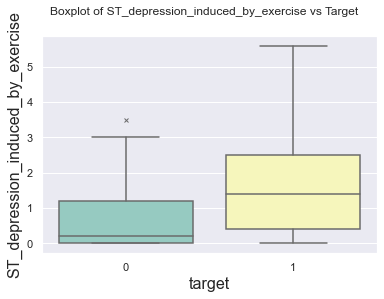

In [116]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.set_context(rc={"font.size":16,"axes.titlesize":18,"axes.labelsize":16})
for i in integerAttributesKey:
    plt.figure(i)
    sns.boxplot(x="target", y=i, data=hd_train, orient="v", palette="Set3", flierprops = dict(marker="x", markersize = 4))
    plt.suptitle(f"Boxplot of {i} vs Target")

    # Print IQR and ceiling floor values
    Q1 = hd_train[i].quantile(0.25)
    Q3 = hd_train[i].quantile(0.75)
    IQR = Q3 - Q1
    low_outliers = Q1 - 1.5 * IQR
    upper_outliers = Q3 + 1.5 * IQR
    number_of_outliers = hd_train[i][(hd_train[i] < low_outliers) | (hd_train[i] > upper_outliers)].count()
    print(f'{i} lower and upper 1.5*IQR and values outside this range is: \n lower: {low_outliers}\tupper: {upper_outliers} \nvalue count: {number_of_outliers}')

### Outlier Decision
Based on these results, there are not many outlier values. Given the box plot visualizations, the outliers are not deemed to be noise and will not be removed from the dataset.

We can also see a potential that:
- age and resting heart rate seem correlated with heart disease
- higher max heart rate is associated with individuals without heart diseases
- cholesterol doesn't have a significant impact
- when a participant had ST depression that is seen after exercise, they were more likely to suffer from heart disease

# Initial Visualizations
We can take a look at some visualizations to see if there are some interesting trends or hypothesis we can test. This will also give us an idea of which models we might want to test and which attributes we expect to have the most impact on our target.

From looking at the boxplots, we also know that our data is in different ranges and we will need to consider applying a normalization depending on the model we choose. We will do that later once we know which models we will try to run.


## Continuous Variables
We'll add some scatterplots and histograms to continue analyzing our numerical data.

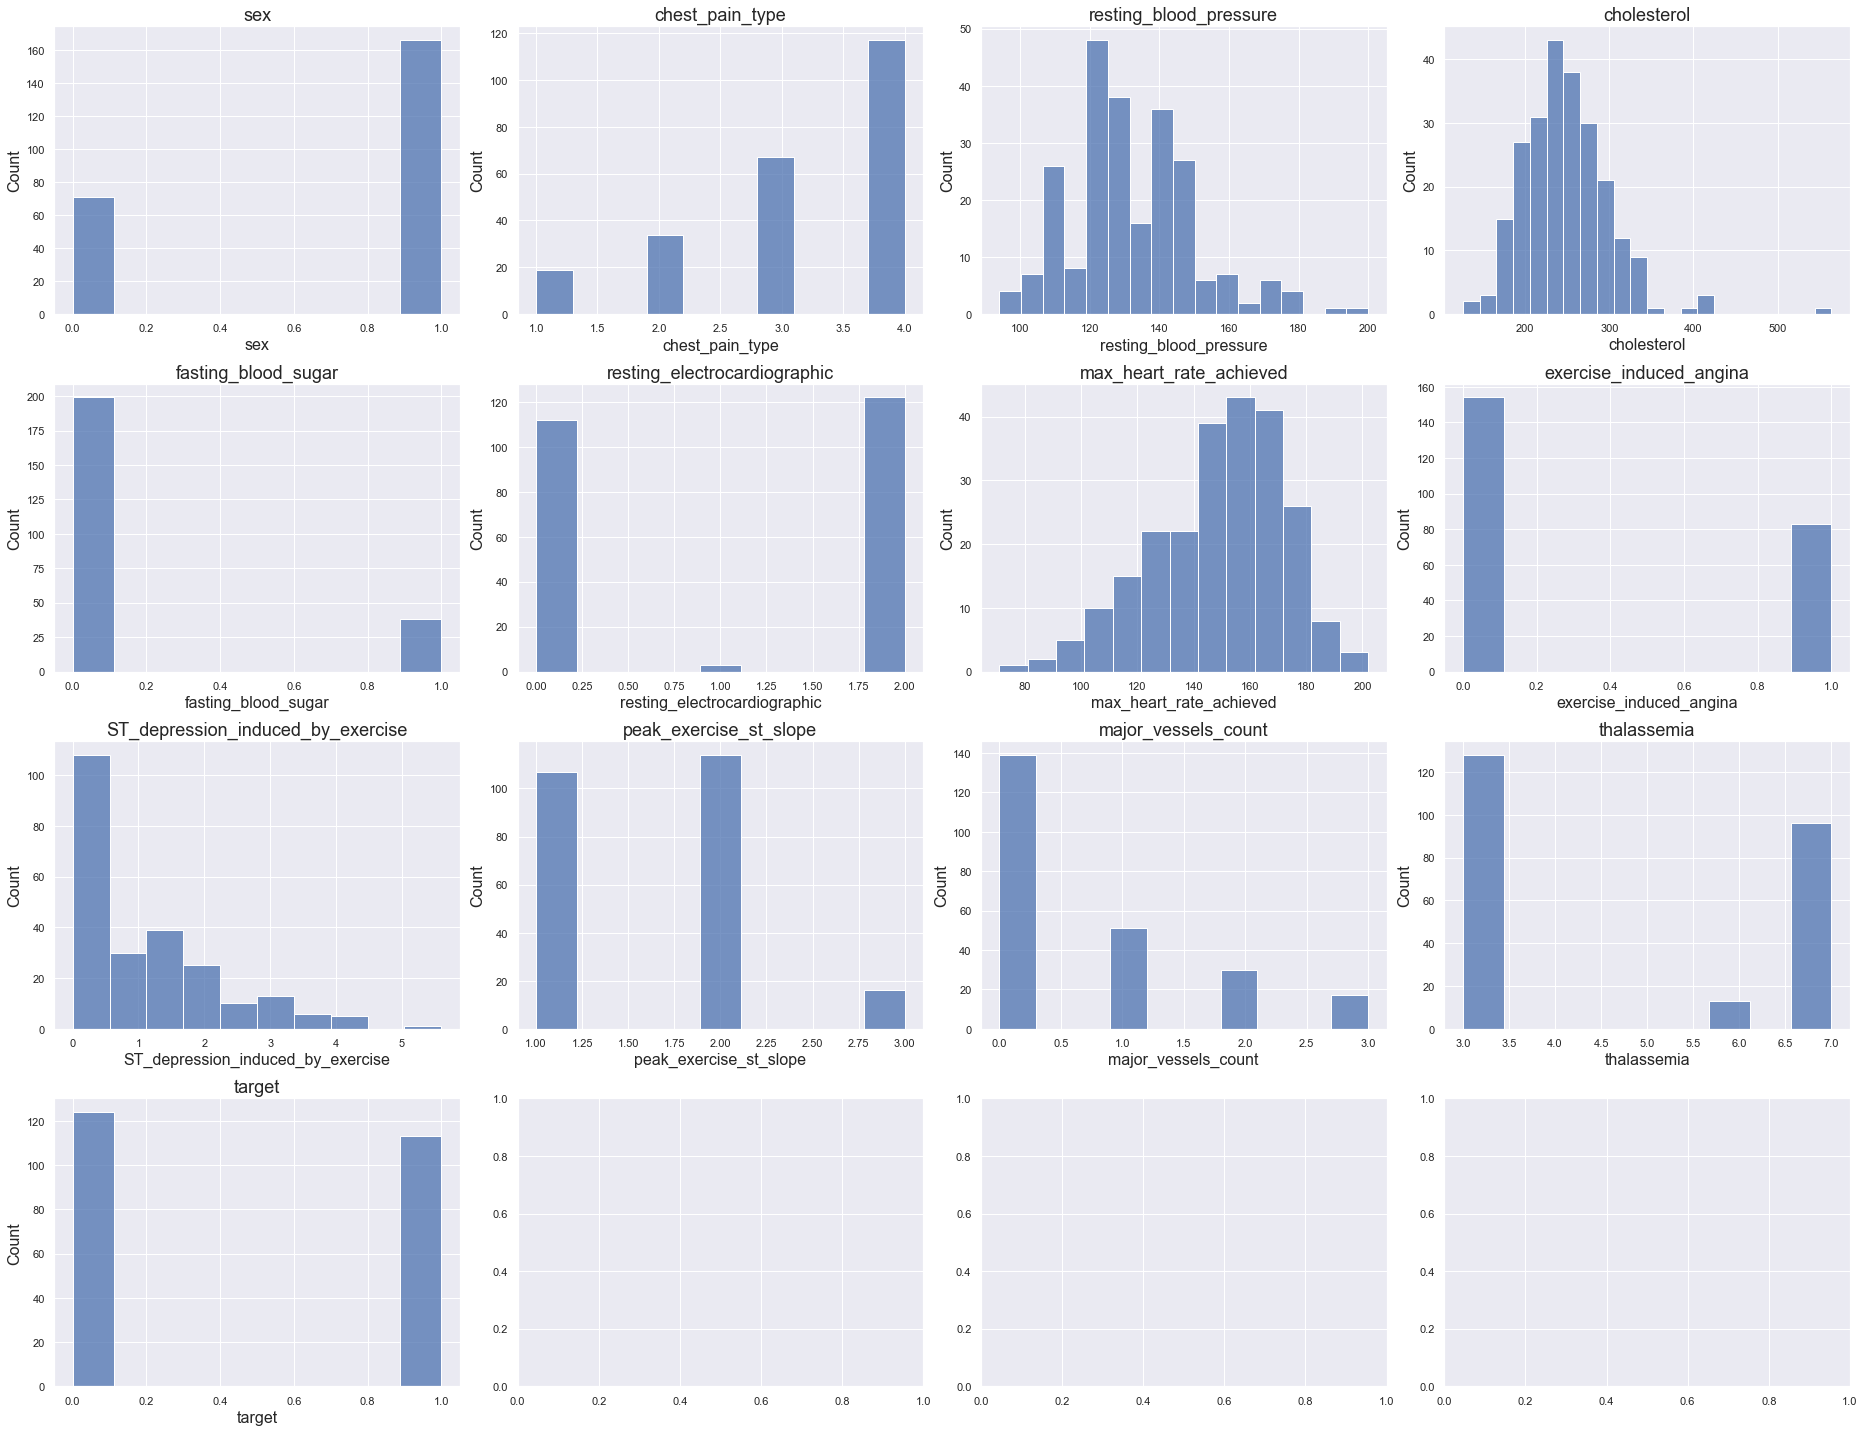

In [117]:

fig, axes = plt.subplots(4,4,figsize=(26,20))
# We will not plot country because it has too many categories.
for index, columnName in enumerate(hd_train.columns[1:]):
    ax = axes.reshape(-1)[index]
    if hd_train[columnName].dtype.kind == 'O':
        a = sns.countplot(x=columnName,data=hd_train,ax=ax)
    else:
        b = sns.histplot(x=columnName,data=hd_train,ax=ax)
    t = ax.set_title(columnName)
plt.tight_layout()

In [159]:
#TODO: Make this bigger
sns.set(rc = {'figure.figsize':(8,8)})

Text(0.5, 0.98, 'Pairwise Relationship Plots of Numerical Values - Target')

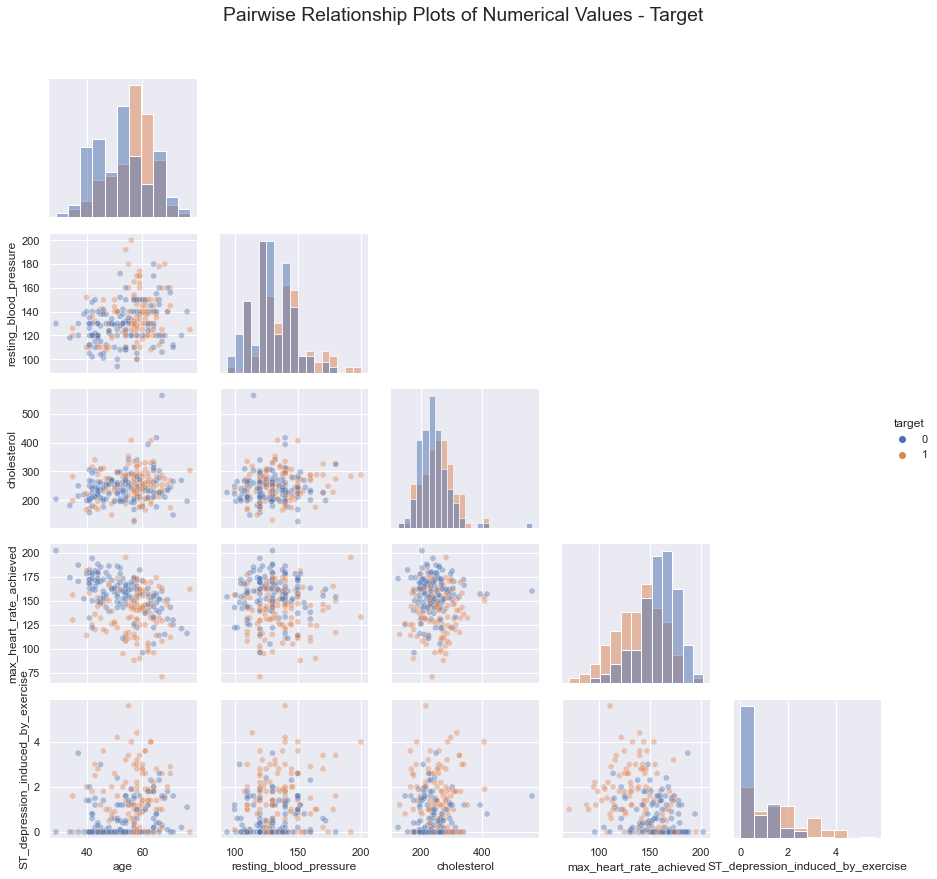

In [154]:
sns.set_context(rc={"font.size":16,"axes.titlesize":12,"axes.labelsize":12,})
pairwise_viz = sns.PairGrid(hd_train, vars=integerAttributesKey, hue="target", diag_sharey=False, corner=True)
pairwise_viz.map_lower(sns.scatterplot, alpha=0.4)
pairwise_viz.map_diag(sns.histplot)
pairwise_viz.add_legend()
pairwise_viz.fig.subplots_adjust(top=0.9)
pairwise_viz.fig.suptitle("Pairwise Relationship Plots of Numerical Values - Target")

It looks like there are a lot of individuals that had no ST depression induced by exercise (value of 0). It might be interesting to see how the target responds to those and without this value present. Let's dive into that.


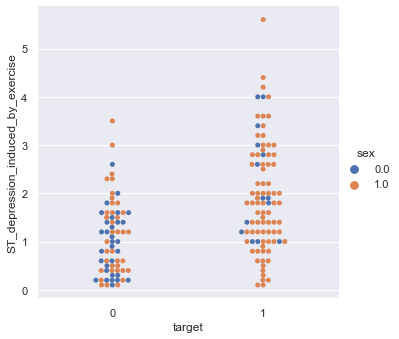

In [155]:
sns.catplot(x="target", y="ST_depression_induced_by_exercise", kind="swarm", hue="sex", data=hd_train[hd_train["ST_depression_induced_by_exercise"] != 0])

<AxesSubplot:xlabel='target', ylabel='count'>

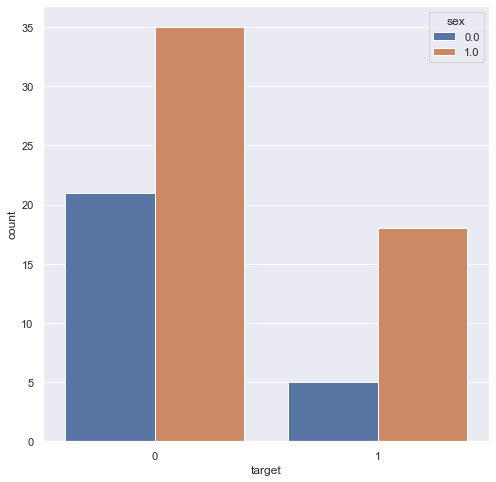

In [160]:
sns.countplot(x="target", hue="sex", data=hd_train[hd_train["ST_depression_induced_by_exercise"] == 0.0])

It looks like non-zero levels of ST depression induced by exercise are more prevalent in males, and those that have higher values have a greater tendency to have heart disease. We can also see that males with zero values have a greater chance of heart disease. Let's see what the absolute impact of sex on heart disease is.

<AxesSubplot:xlabel='target', ylabel='Density'>

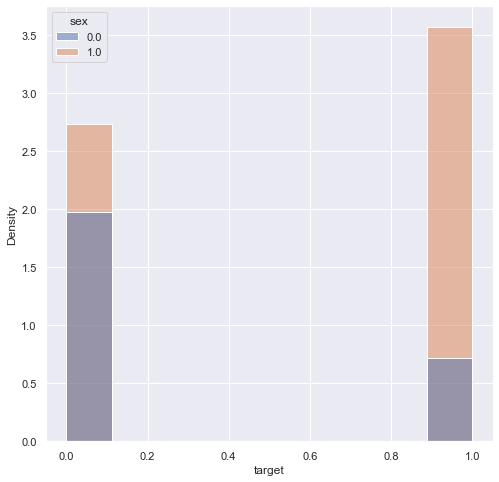

In [161]:
sns.histplot(x="target", stat="density", hue="sex", data=hd_train)

<AxesSubplot:xlabel='age', ylabel='Count'>

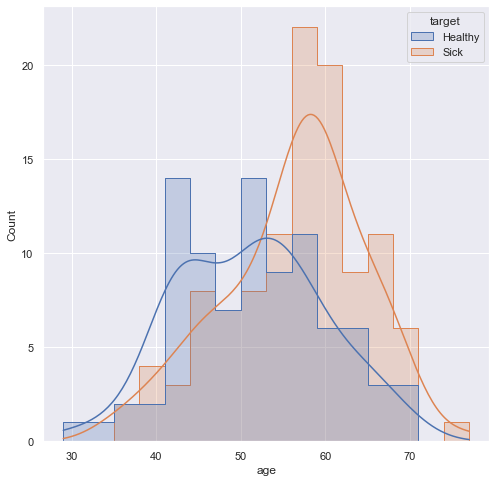

In [170]:
sns.histplot(hd[hd["sex"] == 1.0], x="age", hue="target", element="step", kde=True, binwidth=3)

It looks like our data is generally showing that males are more likely to have heart disease than females. Males with an average age of ~58 are more prone to heart disease.


We can take a look to see if we see any other interesting differences between males and females.
Although nothing jumps out at us, it does look like there is a bit of a "binning" of data for the resting blood pressure. We won't do anything about it at the moment. This may be a result of different methods of collecting blood pressure that resulted in a different level of precision.

Text(0.5, 0.98, 'Pairwise Relationship Plots of Numerical Values - Sex')

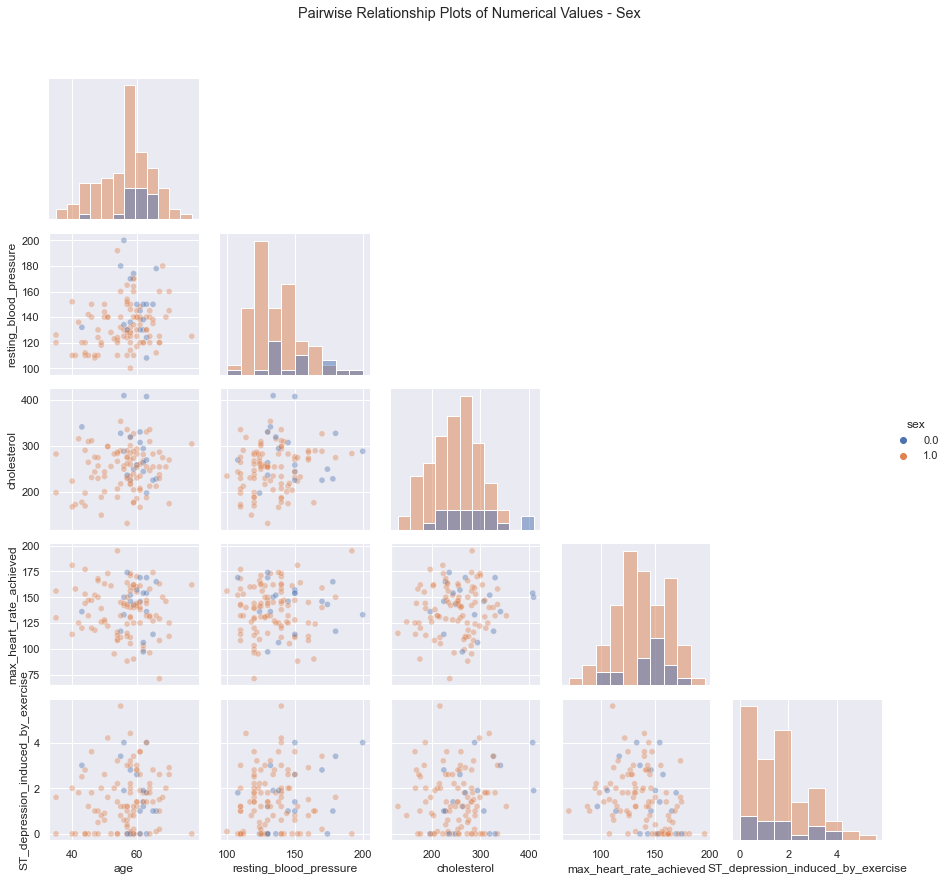

In [172]:
# pairwise_viz = sns.PairGrid(hd_train[hd_train["target"]==1], vars=integerAttributesKey, hue="sex", diag_sharey=False, corner=True)
# pairwise_viz.map_lower(sns.scatterplot, alpha=0.4)
# pairwise_viz.map_diag(sns.histplot)
# pairwise_viz.add_legend()
# pairwise_viz.fig.subplots_adjust(top=0.9)
# pairwise_viz.fig.suptitle("Pairwise Relationship Plots of Numerical Values - Sex")

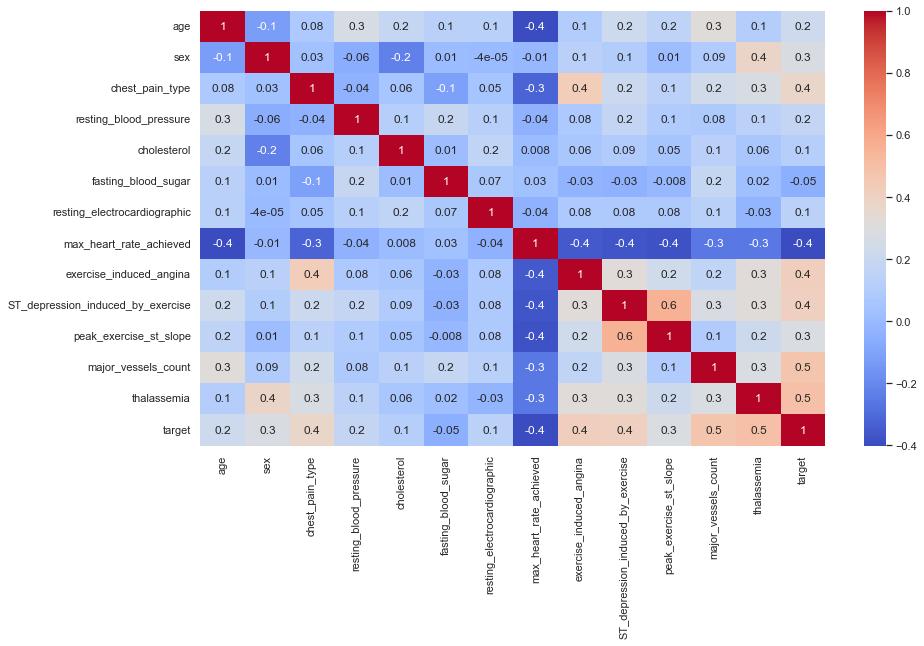

In [173]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = hd_train.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.1g')

<Figure size 360x360 with 0 Axes>

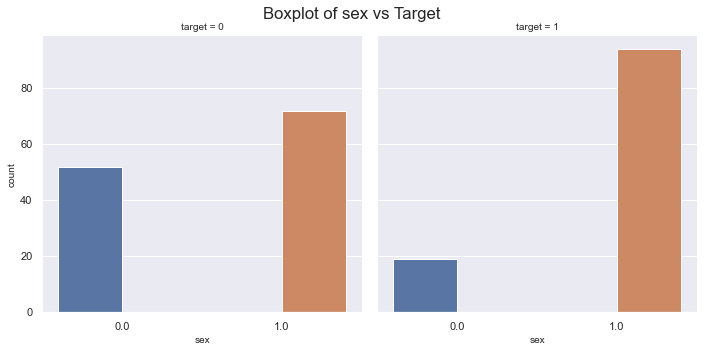

<Figure size 360x360 with 0 Axes>

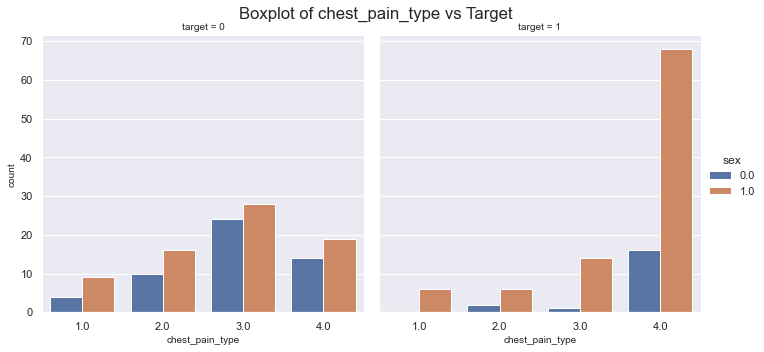

<Figure size 360x360 with 0 Axes>

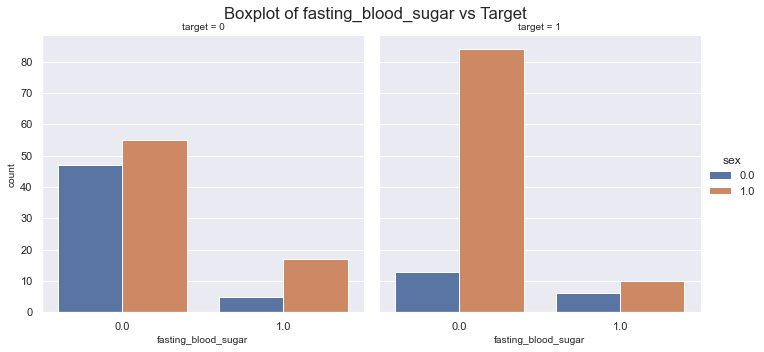

<Figure size 360x360 with 0 Axes>

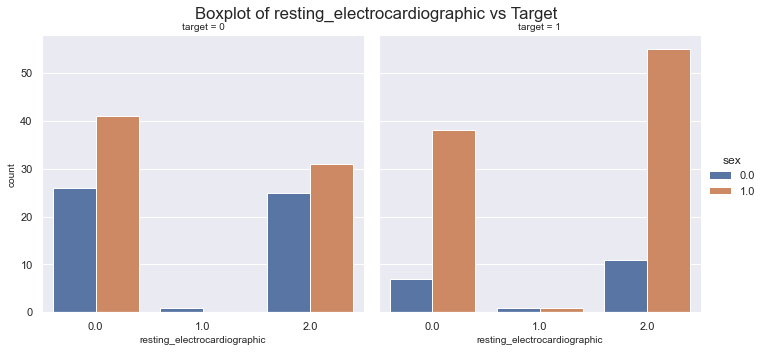

<Figure size 360x360 with 0 Axes>

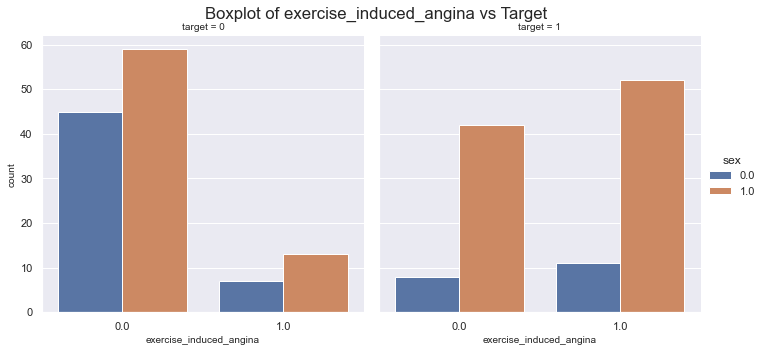

<Figure size 360x360 with 0 Axes>

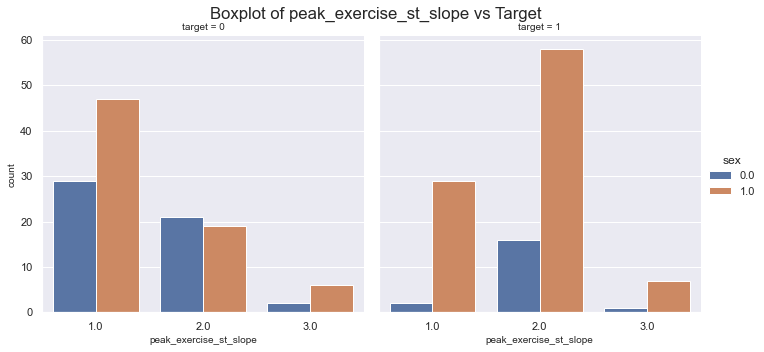

<Figure size 360x360 with 0 Axes>

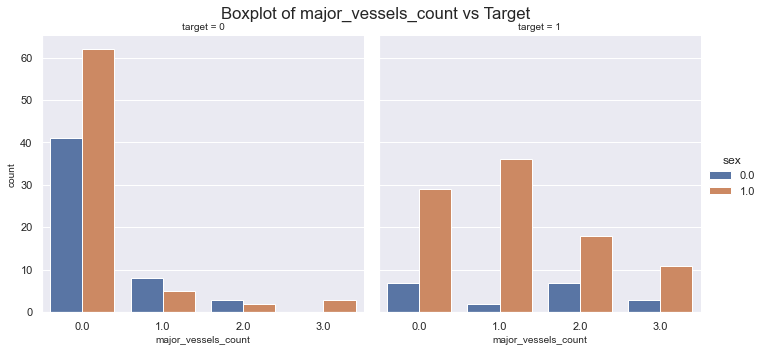

<Figure size 360x360 with 0 Axes>

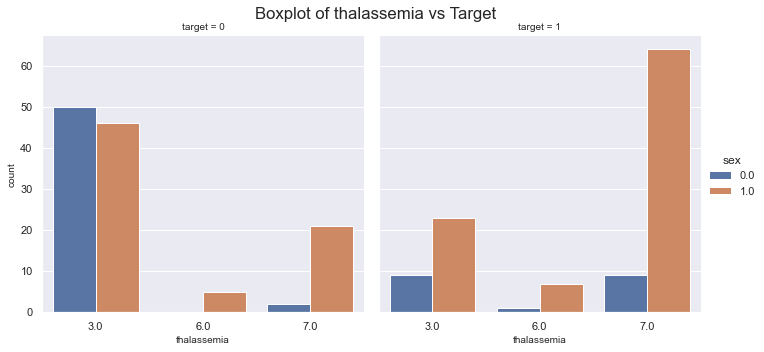

<Figure size 360x360 with 0 Axes>

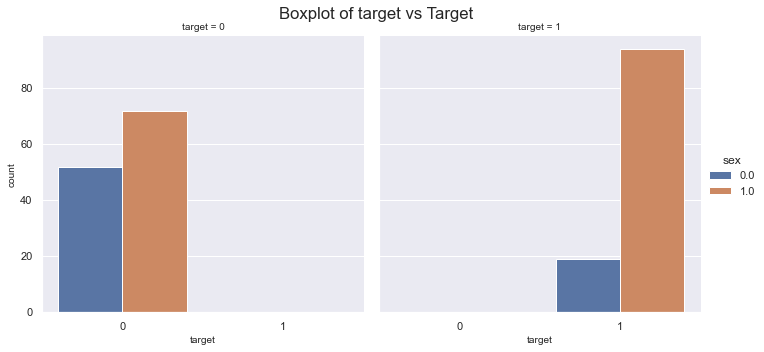

In [176]:
# sns.set(rc = {'figure.figsize':(5,5)})
# sns.set_context(rc={"font.size":14,"axes.titlesize":10,"axes.labelsize":10})
# for i in objectAttributes:
#     plt.figure(i)
#     sns.catplot(x=i, kind="count", hue="sex", col="target", data=hd_train)
#     plt.suptitle(f"Boxplot of {i} vs Target")
#     plt.subplots_adjust(top=0.9)

# Visualization


In [178]:
# sns.countplot('sex', data=hd_train, hue='target')

# Fast Visualization

# Description of the attributes
1. age - age in years

2. sex - (1 = male; 0 = female)

3. cp - chest pain type

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

5. chol - serum cholestoral in mg/dl

serum = LDL + hd_trainL + .2 * triglycerides

above 200 is cause for concern

6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

'>126' mg/dL signals diabetes

7. restecg - resting electrocardiographic results

0: Nothing to note

1: ST-T Wave abnormality

can range from mild symptoms to severe problems

signals non-normal heart beat

2: Possible or definite left ventricular hypertrophy

Enlarged heart's main pumping chamber

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

11. slope - the slope of the peak exercise ST segment

0: Upsloping: better heart rate with excercise (uncommon)

1: Flatsloping: minimal change (typical healthy heart)

2: Downslopins: signs of unhealthy heart

12. ca - number of major vessels (0-3) colored by flourosopy

colored vessel means the doctor can see the blood passing through

the more blood movement the better (no clots)

13. thal - thalium stress result

1,3: normal

6: fixed defect: used to be defect but ok now

7: reversable defect: no proper blood movement when exercising

14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

It looks like ST_depression_induced_by_exercise has lots of 0's. Let's explore that to see how many.

In [179]:
print((hd_train['ST_depression_induced_by_exercise'] == 0).sum())

79


<AxesSubplot:xlabel='ST_depression_induced_by_exercise', ylabel='Count'>

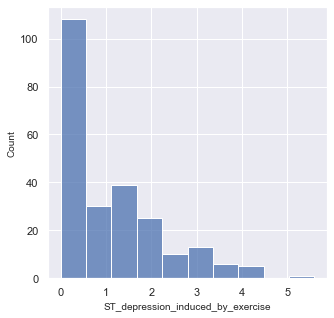

In [180]:
sns.histplot(x="ST_depression_induced_by_exercise",data=hd_train)

Based on research for what ST depression induced by exercise is, we find that it is a measure of change in an ECG reading after exercise. Subjects with a "0" are subjects that did not have any ST depression, where subjects with a non-zero value had some ST depression present. Thus, the "0" values will not be removed and will be considered correct. It could be interesting to come back and bin the data into a "yes/no" categorical for use in model building.